# Доверительные интервалы для доли 

## Генерация данных

In [1]:
import numpy as np

In [2]:
np.random.seed(1)

statistical_population = np.random.randint(2, size = 100000) 

random_sample = np.random.choice(statistical_population, size = 1000)

In [3]:
#истинное значение доли
statistical_population.mean()

0.49770999999999999

## Точечная оценка доли

In [4]:
random_sample.mean()

0.502

## Доверительный интервал для доли

In [1]:
from statsmodels.stats.proportion import proportion_confint

### Доверительный интервал на основе нормального распределения

$$\hat{p}\pm z_{1-\frac{\alpha}{2}} \sqrt{\frac{\hat{p}\left(1-\hat{p}\right)}{n}}$$

In [6]:
normal_interval = proportion_confint(sum(random_sample), len(random_sample), method = 'normal')

In [7]:
print 'normal_interval [%f, %f] with width %f' % (normal_interval[0],
                                                  normal_interval[1], 
                                                  normal_interval[1] - normal_interval[0])

normal_interval [0.471010, 0.532990] with width 0.061979


### Доверительный интервал Уилсона

$$\frac1{ 1 + \frac{z^2}{n} } \left( \hat{p} + \frac{z^2}{2n} \pm z \sqrt{ \frac{ \hat{p}\left(1-\hat{p}\right)}{n} + \frac{
z^2}{4n^2} } \right), \;\; z \equiv z_{1-\frac{\alpha}{2}}$$ 

In [8]:
wilson_interval = proportion_confint(sum(random_sample), len(random_sample), method = 'wilson')

In [9]:
print 'wilson_interval [%f, %f] with width %f' % (wilson_interval[0],
                                                  wilson_interval[1],
                                                  wilson_interval[1] - wilson_interval[0])

wilson_interval [0.471062, 0.532922] with width 0.061860


## Размер выборки для интервала заданной ширины

In [7]:
from statsmodels.stats.proportion import samplesize_confint_proportion

In [11]:
n_samples = int(np.ceil(samplesize_confint_proportion(random_sample.mean(), 0.01)))
n_samples

9604

In [12]:
np.random.seed(1)
random_sample = np.random.choice(statistical_population, size = n_samples)

In [13]:
normal_interval = proportion_confint(sum(random_sample), len(random_sample), method = 'normal')

In [2]:
print 'normal_interval [%f, %f] with width %f' % (normal_interval[0],
                                                  normal_interval[1],
                                                  normal_interval[1] - normal_interval[0])

NameError: name 'normal_interval' is not defined

In [5]:
normal_interval = proportion_confint(1, 50, method = 'wilson')

In [6]:
normal_interval

(0.0035392592716462362, 0.10495443589637815)

In [9]:
samplesize_confint_proportion(0.02, 0.01)

752.92592885604893

In [12]:
import numpy as np
x = np.arange(0,1,0.01)

In [22]:
y = (samplesize_confint_proportion(x, 0.01))

In [24]:
#len(y)

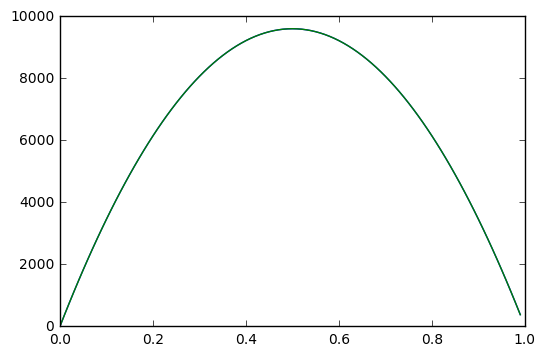

In [25]:
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.show()

In [26]:
y.max()

9603.6470517353173